# AI Research on France


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

ModuleNotFoundError: No module named 'wordcloud'

In [14]:

research = pd.read_csv("C:/Users/Jhonnatan/Documents/GitHub/Impact-of-AI-in-organizations/Datasets/scopus.csv")
research.head()


,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Ahmad Husairi M.; Rossi P.,"Ahmad Husairi, Mariyani (57222988933); Rossi, ...",57222988933; 56289040400,Delegation of purchasing tasks to AI: The role...,2024,Decision Support Systems,179,NaN,114166,NaN,...,NaN,DSSYD,NaN,English,Decis Support Syst,Article,Final,NaN,Scopus,2-s2.0-85181774528
1,Pagallo U.; O’Sullivan S.; Nevejans N.; Holzin...,"Pagallo, Ugo (19337758400); O’Sullivan, Shane ...",19337758400; 57205361372; 57205364562; 2339628...,The underuse of AI in the health sector: Oppor...,2024,Health and Technology,14,1,NaN,1,...,NaN,NaN,NaN,English,Health Technol.,Review,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85179329265
2,Karapantelakis A.; Alizadeh P.; Alabassi A.; D...,"Karapantelakis, Athanasios (35113103400); Aliz...",35113103400; 58540431900; 58540313100; 5722251...,Generative AI in mobile networks: a survey,2024,Annales des Telecommunications/Annals of Telec...,79,1-2,NaN,15,...,NaN,ANTEA,NaN,English,Ann Telecommun,Article,Final,NaN,Scopus,2-s2.0-85168263912
3,Beljaards L.; Pezzotti N.; Rao C.; Doneva M.; ...,"Beljaards, Laurens (57219764499); Pezzotti, Ni...",57219764499; 58150639100; 57222130969; 2398862...,AI-based motion artifact severity estimation i...,2024,Medical Physics,NaN,NaN,NaN,NaN,...,NaN,MPHYA,NaN,English,Med. Phys.,Article,Article in press,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85181252141
4,Borghesani P.; Herwig N.; Antoni J.; Wang W.,"Borghesani, P. (54929106000); Herwig, N. (5721...",54929106000; 57210189917; 7003925399; 55319557300,A Fourier-based explanation of 1D-CNNs for mac...,2023,Mechanical Systems and Signal Processing,205,NaN,110865,NaN,...,NaN,MSSPE,NaN,English,Mech Syst Signal Process,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85174572960


In [3]:
research.describe()

,Year,Page count,Cited by,Conference code,PubMed ID
count,5817.000000,4166.000000,5817.000000,1907.000000,1.439000e+03
mean,2020.042806,15.045127,16.877256,186181.797588,3.175342e+07
std,2.747524,36.360512,82.681028,47849.199009,4.131631e+06
min,2012.000000,-55.000000,0.000000,90173.000000,2.223815e+07
25%,2019.000000,6.000000,0.000000,159372.000000,2.860824e+07
50%,2021.000000,9.000000,3.000000,177217.000000,3.224086e+07
75%,2022.000000,14.000000,12.000000,193756.000000,3.509473e+07
max,2024.000000,1057.000000,3175.000000,306209.000000,3.821571e+07


# Business and AI Research on France

In [12]:
import pandas as pd
research_bs = pd.read_csv("C:/Users/Jhonnatan/Documents/GitHub/Impact-of-AI-in-organizations/Datasets/scopus_AI_business.csv")
research_bs.head()
data = research_bs

In [10]:
# Extract descriptions from the 'description' column of the dataframe
documents = research['Abstract'].tolist()
documents = [f'"""{doc}"""' for doc in documents]
#documents

### Trend in AI and Machine Learning Research in Business and Management

The graph illustrates the number of publications related to AI and machine learning in business and management per year. It shows a trend in the volume of research in this field, which can be indicative of the growing interest and importance of AI and machine learning in these areas.

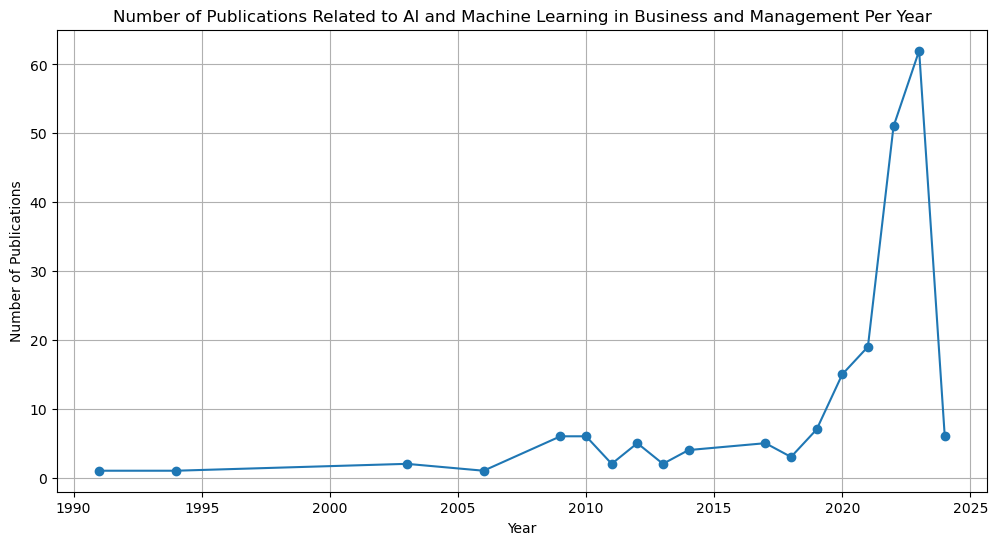

In [15]:
# Filter the dataset for relevant publications (considering all as relevant for now)
# and count the number of publications per year
publication_count = data['Year'].value_counts().sort_index()

# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(publication_count.index, publication_count.values, marker='o')
plt.title('Number of Publications Related to AI and Machine Learning in Business and Management Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.show()

### Topics of interest within these publications. 

The word cloud visualizes the most frequent terms in the titles of AI and machine learning publications related to business and management. This visualization helps us identify key themes and topics that are prominent in the research.

From the word cloud, we can observe terms that might be associated with the impact points you mentioned, such as "automation," "decision-making," "resource," "planning," and "ethical." This suggests that these areas are indeed focal points in the research on AI and machine learning in the context of work organization.

In [22]:


# Function to clean and prepare text data
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    return text

# Prepare the titles for analysis
titles = data['Title'].dropna().apply(clean_text)

# Combine all titles into a single string
all_titles = ' '.join(titles)

# Create a word frequency dictionary
word_freq = Counter(all_titles.split())

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plotting the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles in AI and Machine Learning Publications in Business and Management')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'